In [88]:
#import libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [89]:
#loasd dataset

train_df = pd.read_csv(r'C:\Users\Tarun\Desktop\train.csv',encoding='latin')

test_df=pd.read_csv(r'C:\Users\Tarun\Desktop\test1.csv',encoding='latin')

In [90]:
#datatype of dataset categorical and continuous

train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [91]:
#dimension of train_dataset
train_df.shape

(891, 12)

In [92]:
#Analysis of train dataset

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Treating Missing Values

In [93]:
# printing missing values

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
#filling Age with median as age is right skewed

train_df["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

In [95]:
#cabin contains many NaN values, dropping Cabin

train_df.drop('Cabin', axis=1, inplace=True)

In [96]:
#AS Embarked has only two NaN Values fillinh it with Max od the column

train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)

In [97]:
# All missing values are treated throughout the dataset

train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
# As SibSp and Parch describes the passenger state, Putting it into A single feature i.e. 'TravelType'

train_df['TravelType']=np.where((train_df['SibSp']+train_df['Parch'])>0,0,1)

#droping the extra columns
train_df.drop('SibSp',axis=1,inplace=True)
train_df.drop('Parch',axis=1,inplace=True)

In [99]:
#Creating DummyVariable for Categorival Values

train_db=pd.get_dummies(train_df,columns=['Pclass','Embarked','Sex'])

train_db.drop('PassengerId', axis=1, inplace=True)
train_db.drop('Name', axis=1, inplace=True)
train_db.drop('Ticket', axis=1, inplace=True)

train = train_db

#Final train dataset created with only continuous data
train.head()

,Survived,Age,Fare,TravelType,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,0,1


In [100]:
#drop Sex_female
train.drop('Sex_female',axis=1,inplace=True)


In [101]:
#head of train
train.head()

,Survived,Age,Fare,TravelType,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [102]:

#treating the missing values for Test data set

test_df['Age'].fillna(test_df['Age'].median(skipna=True),inplace=True)


#filling missing values in Fare column with median of Fare

test_df['Fare'].fillna(test_df['Fare'].median(skipna=True),inplace=True)

#Dropping Cabin as it contains many NaN values

test_df.drop('Cabin',axis=1,inplace=True)

test_df['TravelType']=np.where((test_df['SibSp']+df_test['Parch'])>0,0,1)

test_df.drop('SibSp',axis=1,inplace=True)
test_df.drop('Parch',axis=1,inplace=True)

In [103]:
# In test dataset treating with, categorical values

db=pd.get_dummies(test_df,columns=['Pclass','Embarked','Sex'])

#droping extran columns
db.drop('PassengerId',axis=1,inplace=True)
db.drop('Name',axis=1,inplace=True)
db.drop('Ticket',axis=1,inplace=True)

test=db

#creating final test dataset
test.head()

,Age,Fare,TravelType,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,0,1
4,22.0,12.2875,0,0,0,1,0,0,1,1,0


In [104]:
#droping Sex_females from test dataset
test.drop('Sex_female',axis=1,inplace=True)


In [105]:
#head of test dataset

test.head()

,Age,Fare,TravelType,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


## Exploratory Data Analysis

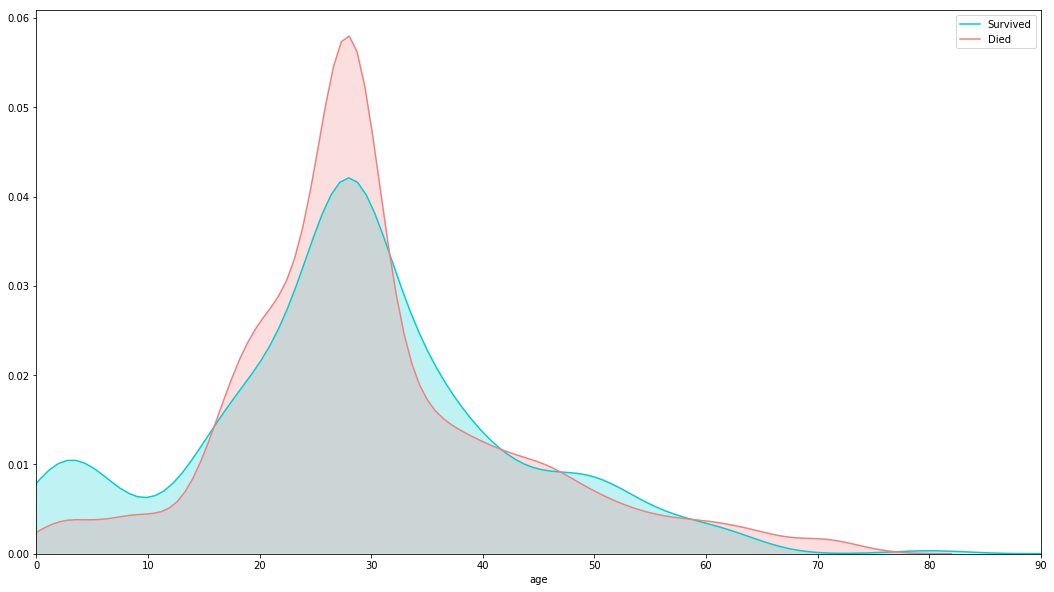

In [106]:
#plotting grapg Between Age and Survival of passengers


plt.figure(figsize=(18,10))
ax = sns.kdeplot(train["Age"][train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Age"][train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
ax.set(xlabel='age')
plt.xlim(0,90)
plt.show()

<b> From above graph , we can conclude that passengers having age<16 have higher chances of survival as compared to other age groups. 

In [107]:
#Creating Extra Feature whether a passenger is minor or not.As it can also be a major factor ,while building our model.

train['minoris']=np.where(train['Age']<=16,1,0)

test['minoris']=np.where(test['Age']<=16,1,0)

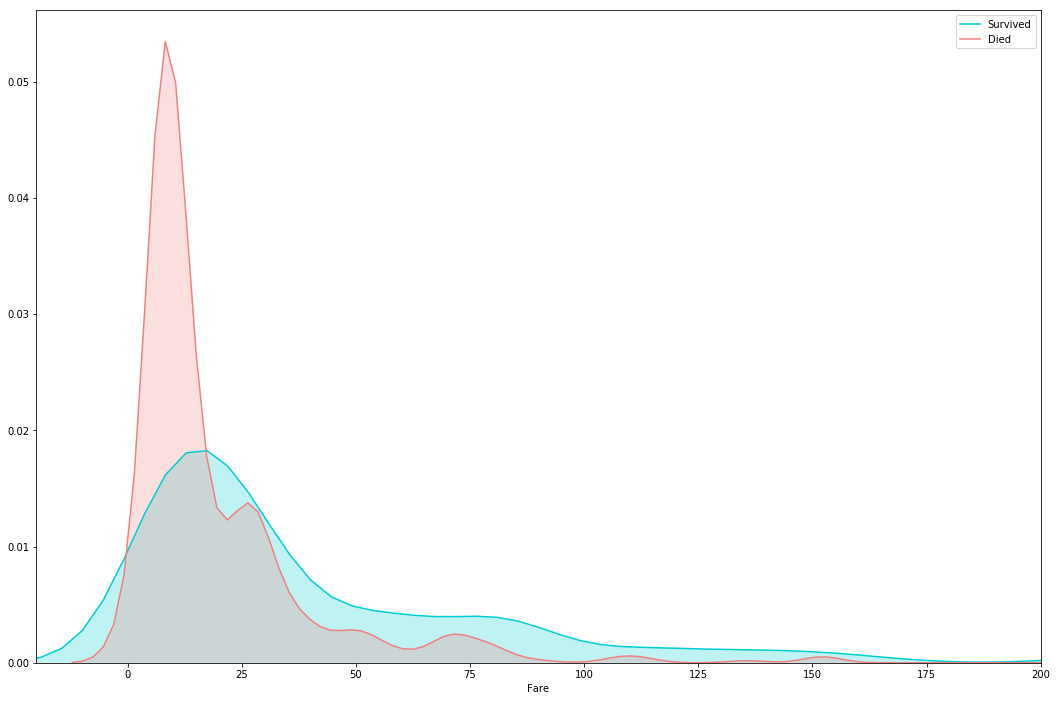

In [108]:

#Plotting Between fare and Survived

plt.figure(figsize=(18,12))
ax = sns.kdeplot(train['Fare'][train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train['Fare'][train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

<b> From above graph, we can interpret that passengers having lower fare not able to survive, as more richer person has more chances of survival. 

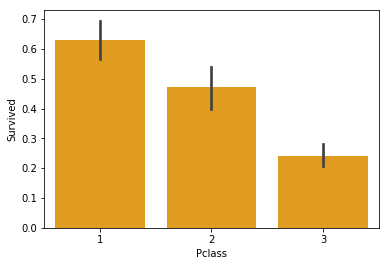

In [109]:
#plot between Pclass and Survival

sns.barplot('Pclass','Survived',data=train_df,color='orange')
plt.show()

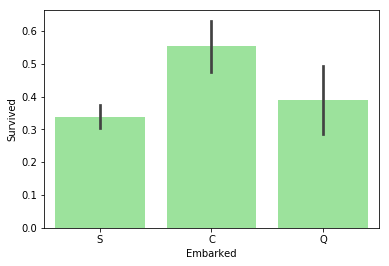

In [110]:
#plot between EmbarkedPort and Survival

sns.barplot('Embarked','Survived',data=train_df,color='lightgreen')

## Data Rescaling

In [111]:
##rescaling

from sklearn.preprocessing import StandardScaler

# rescaling model using StandardScaler
scaler=StandardScaler()
#only fare is more dispersed among other features.
train[['Fare']]=scaler.fit_transform(train[['Fare']])

In [112]:
#importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

In [113]:
#importing RFE for feature Extraction
from sklearn.feature_selection import RFE


#taking all the columns from trian dataset except categorical data
key=['Age','Fare','TravelType','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','minoris']


# making X_train and Y_train to split the data
X=train[key]
Y=train['Survived'] 

model=LogisticRegression()


#fitting in the RFE model to best select the features

rfe=RFE(model,10)
rfe=rfe.fit(X,Y)

# printing the Best Features 

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Fare', 'TravelType', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'minoris']


In [114]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('Age', True, 1),
 ('Fare', True, 1),
 ('TravelType', True, 1),
 ('Pclass_1', True, 1),
 ('Pclass_2', True, 1),
 ('Embarked_C', True, 1),
 ('Embarked_S', True, 1),
 ('Sex_male', True, 1),
 ('minoris', True, 1)]

In [115]:
#droping other features , not sleceted by RFE

key=X.columns[rfe.support_]
X.columns[~rfe.support_]

Index([], dtype='object')

## Correlation Analysis

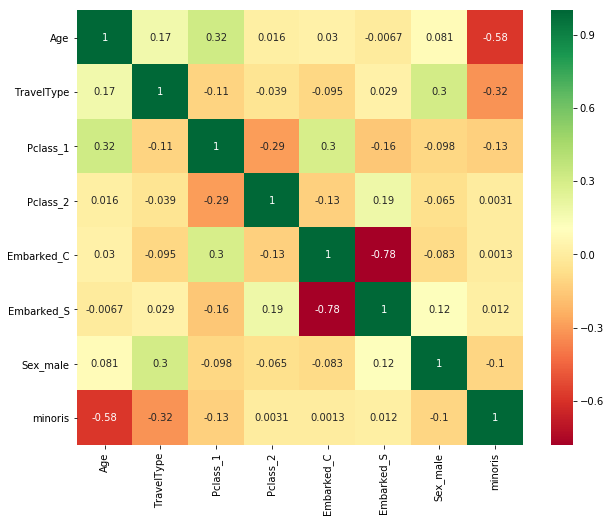

In [116]:

#Plotting HeatMap and analysing the correlation among best features selected by RFE

key = ['Age', 'TravelType', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'minoris']
X = train[key]

plt.subplots(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [117]:
#model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


#creating the dependent and independent variable for the model
X = train[key]
Y = train['Survived']

# splitting the data into trianing and testing   using traintestsplit from sklearn.model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


logreg = LogisticRegression()

#fitting the model
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [118]:
# Accuracy of Model

print("LogisticRegression accuracy is : %f" % accuracy_score(Y_test, Y_pred))

LogisticRegression accuracy is : 0.782123


## Prediction 

In [119]:
#Predicted Array:-

output=logreg.predict(test[key])
output

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:

# putting the predicted value in test dataset
test['Survived'] = logreg.predict(test[key])

#putting the passengerId in test dataset
test['PassengerId'] = test_df['PassengerId']



submission = test[['PassengerId','Survived']]

#Exporting the final result in gendersubmission.csv
submission.to_csv("gendersubmission.csv",encoding='latin')




In [123]:
#Printing final output
print('Predicted Data:')
submission.head()

Predicted Data:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
